In [1]:
!pip install tensorflow
!pip install scikit-learn
!pip install opencv-python
!pip install split-folders

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d samaneheslamifar/facial-emotion-expressions

Dataset URL: https://www.kaggle.com/datasets/samaneheslamifar/facial-emotion-expressions
License(s): unknown
 76% 92.0M/121M [00:00<00:00, 962MB/s]
100% 121M/121M [00:00<00:00, 746MB/s] 


In [4]:
from zipfile import ZipFile
dataset = '/content/facial-emotion-expressions.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import splitfolders
%matplotlib inline

In [6]:
path = '/content/images/'
os.listdir(path)

['train', 'validation', 'images']

In [7]:
directory = "data"
os.mkdir(directory)

In [8]:
angry = '/content/data/angry'
disgust = '/content/data/disgust'
fear = '/content/data/fear'
happy = '/content/data/happy'
neutral = '/content/data/neutral'
sad = '/content/data/sad'
surprise = '/content/data/surprise'
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [9]:
os.chdir('/content/data/')
for i in emotions:
  os.mkdir(i)

In [10]:
z=0

In [11]:
for i in os.listdir("/content/images/images/train"):
    for j in os.listdir("/content/images/images/train/"+i):
        im=cv2.imread("/content/images/images/train/"+i+"/"+j)
        cv2.imwrite("/content/data/"+i+"/"+str(z).zfill(5)+".jpg",im)
        z+=1

In [12]:
for i in os.listdir("/content/images/images/validation/"):
    for j in os.listdir("/content/images/images/validation/"+i):
        im=cv2.imread("/content/images/images/validation/"+i+"/"+j)
        cv2.imwrite("/content/data/"+i+"/"+str(z).zfill(5)+".jpg",im)
        z+=1

In [13]:
for i in os.listdir("/content/images/train"):
    for j in os.listdir("/content/images/train/"+i):
        im=cv2.imread("/content/images/train/"+i+"/"+j)
        cv2.imwrite("/content/data/"+i+"/"+str(z).zfill(5)+".jpg",im)
        z+=1

In [14]:
for i in os.listdir("/content/images/validation"):
    for j in os.listdir("/content/images/validation/"+i):
        im=cv2.imread("/content/images/validation/"+i+"/"+j)
        cv2.imwrite("/content/data/"+i+"/"+str(z).zfill(5)+".jpg",im)
        z+=1

In [15]:
for i in os.listdir("/content/data"):
    print("=>"+i+" folder contains: "+str(len(os.listdir("/content/data/"+i)))+" images")

=>neutral folder contains: 12396 images
=>surprise folder contains: 8004 images
=>sad folder contains: 12154 images
=>happy folder contains: 17978 images
=>angry folder contains: 9906 images
=>fear folder contains: 10242 images
=>disgust folder contains: 1094 images


In [16]:
os.chdir('/content/')
splitfolders.ratio('/content/data', output="newData", seed=1337, ratio=(0.75, 0.1,0.15))

Copying files: 71774 files [00:08, 8337.59 files/s]


In [17]:
datasetPath="/content/newData/"

In [18]:
for i in os.listdir(datasetPath):
    print("==> "+i+" folder contains:")
    for j in os.listdir(datasetPath+i):
        print("\t => "+j+" folder contains: "+str(len(os.listdir(datasetPath+i+"/"+j)))+" images.")

==> test folder contains:
	 => neutral folder contains: 1860 images.
	 => surprise folder contains: 1201 images.
	 => sad folder contains: 1824 images.
	 => happy folder contains: 2698 images.
	 => angry folder contains: 1487 images.
	 => fear folder contains: 1537 images.
	 => disgust folder contains: 165 images.
==> val folder contains:
	 => neutral folder contains: 1239 images.
	 => surprise folder contains: 800 images.
	 => sad folder contains: 1215 images.
	 => happy folder contains: 1797 images.
	 => angry folder contains: 990 images.
	 => fear folder contains: 1024 images.
	 => disgust folder contains: 109 images.
==> train folder contains:
	 => neutral folder contains: 9297 images.
	 => surprise folder contains: 6003 images.
	 => sad folder contains: 9115 images.
	 => happy folder contains: 13483 images.
	 => angry folder contains: 7429 images.
	 => fear folder contains: 7681 images.
	 => disgust folder contains: 820 images.


In [19]:
imgSize = (64,64)

In [20]:
X_train=[]
X_test=[]
X_val=[]
y_train=[]
y_test=[]
y_val=[]

In [21]:
for i in os.listdir(datasetPath+"train"):
    for j in os.listdir(datasetPath+"train/"+i):
        im=cv2.imread(datasetPath+"train/"+i+"/"+j)
        image=cv2.resize(im,imgSize)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        X_train.append(img)
        y_train.append(i)

In [22]:
for i in os.listdir(datasetPath+"test"):
    for j in os.listdir(datasetPath+"test/"+i):
        im=cv2.imread(datasetPath+"test/"+i+"/"+j)
        image=cv2.resize(im,imgSize)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        X_test.append(img)
        y_test.append(i)

In [23]:
for i in os.listdir(datasetPath+"val"):
    for j in os.listdir(datasetPath+"val/"+i):
        im=cv2.imread(datasetPath+"val/"+i+"/"+j)
        image=cv2.resize(im,imgSize)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        X_val.append(img)
        y_val.append(i)

In [24]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))
print(len(X_val),len(y_val))

53828 53828
10772 10772
7174 7174


In [25]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)
X_val, y_val = shuffle(X_val, y_val, random_state=42)

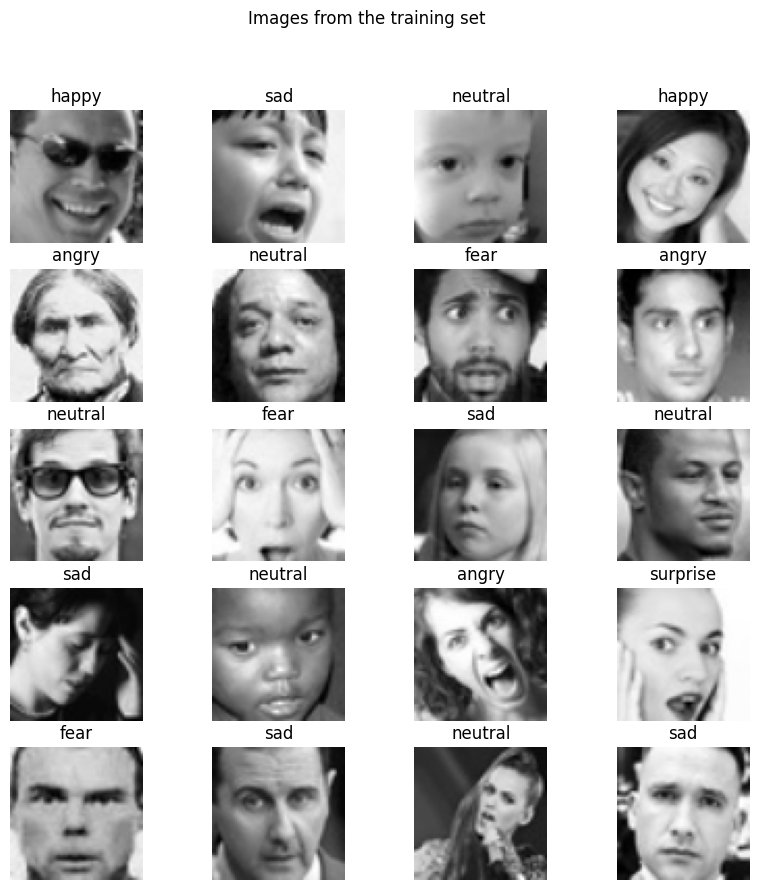

In [26]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    a=np.random.randint(0,len(X_train))
    plt.imshow(X_train[a],cmap="gray")
    plt.title(y_train[a])
    plt.axis("off")
plt.suptitle("Images from the training set")
plt.show()

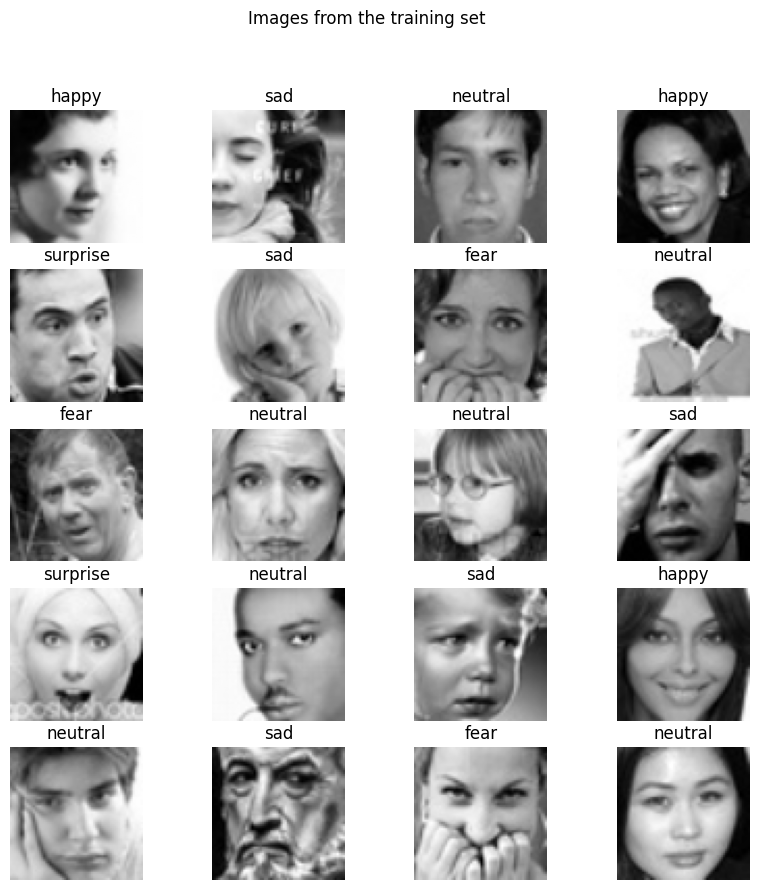

In [27]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    a=np.random.randint(0,len(X_test))
    plt.imshow(X_test[a],cmap="gray")
    plt.title(y_test[a])
    plt.axis("off")
plt.suptitle("Images from the training set")
plt.show()

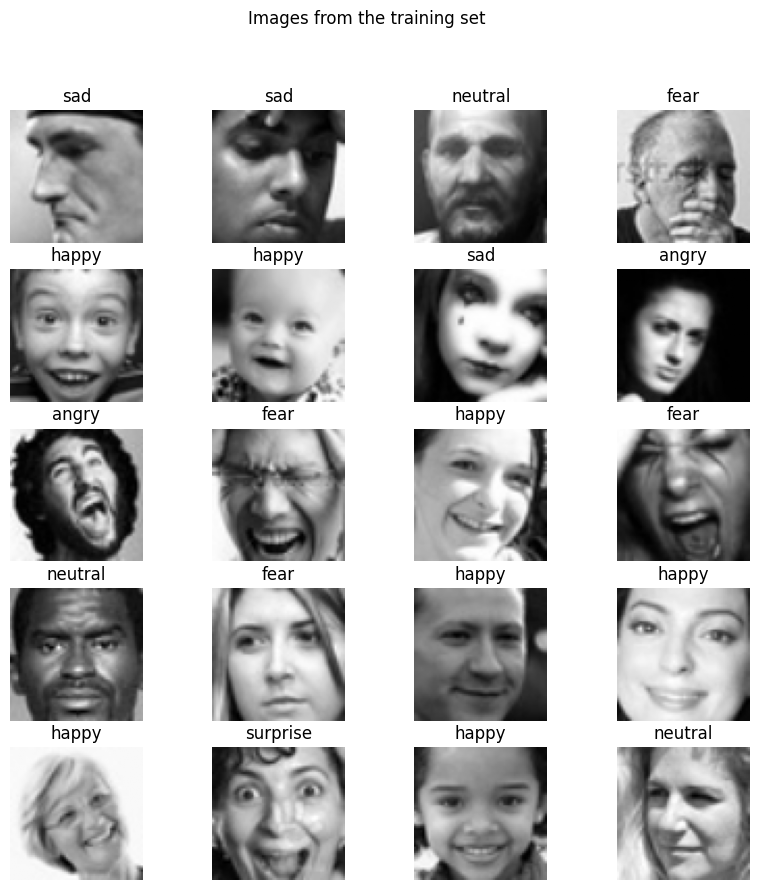

In [28]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    a=np.random.randint(0,len(X_val))
    plt.imshow(X_val[a],cmap="gray")
    plt.title(y_val[a])
    plt.axis("off")
plt.suptitle("Images from the training set")
plt.show()

In [29]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [30]:
X_train = tf.stack(X_train)
X_test = tf.stack(X_test)
X_val = tf.stack(X_val)

In [ ]:
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)
X_val = tf.expand_dims(X_val, axis=-1)

In [31]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential([
    layers.InputLayer(shape=(64,64,1)),
    layers.Rescaling(1.0/255),
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Conv2D(32, (3,3), padding='same',activation='relu'),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(7, kernel_regularizer=regularizers.l2(1e-4))
])

In [32]:
from tensorflow.keras import losses

Epochs = 70
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 128)      │             

 Total params: 1,594,359 (6.08 MB)

 Trainable params: 1,593,879 (6.08 MB)

 Non-trainable params: 480 (1.88 KB)

In [34]:
history = model.fit(X_train, y_train, epochs=Epochs, validation_data=(X_val, y_val))

Epoch 1/100
1683/1683 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.2800 - loss: 1.7890 - val_accuracy: 0.4257 - val_loss: 1.4613
Epoch 2/100
1683/1683 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4477 - loss: 1.4274 - val_accuracy: 0.4866 - val_loss: 1.3251
Epoch 3/100
1683/1683 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4969 - loss: 1.3086 - val_accuracy: 0.5294 - val_loss: 1.2118
Epoch 4/100
1683/1683 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5329 - loss: 1.2346 - val_accuracy: 0.5658 - val_loss: 1.1481
Epoch 5/100
1683/1683 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.5560 - loss: 1.1735 - val_accuracy: 0.5765 - val_loss: 1.1136
Epoch 6/100
1683/1683 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.5817 - loss: 1.1116 - val_accuracy: 0.6029 - val_loss: 1.0360
Epoch 7/100
1683/1683 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6013 - loss: 1.0581 - val_accuracy: 0.6209 - val_loss: 1.0057
Epoch 8/100
1683/1683 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 

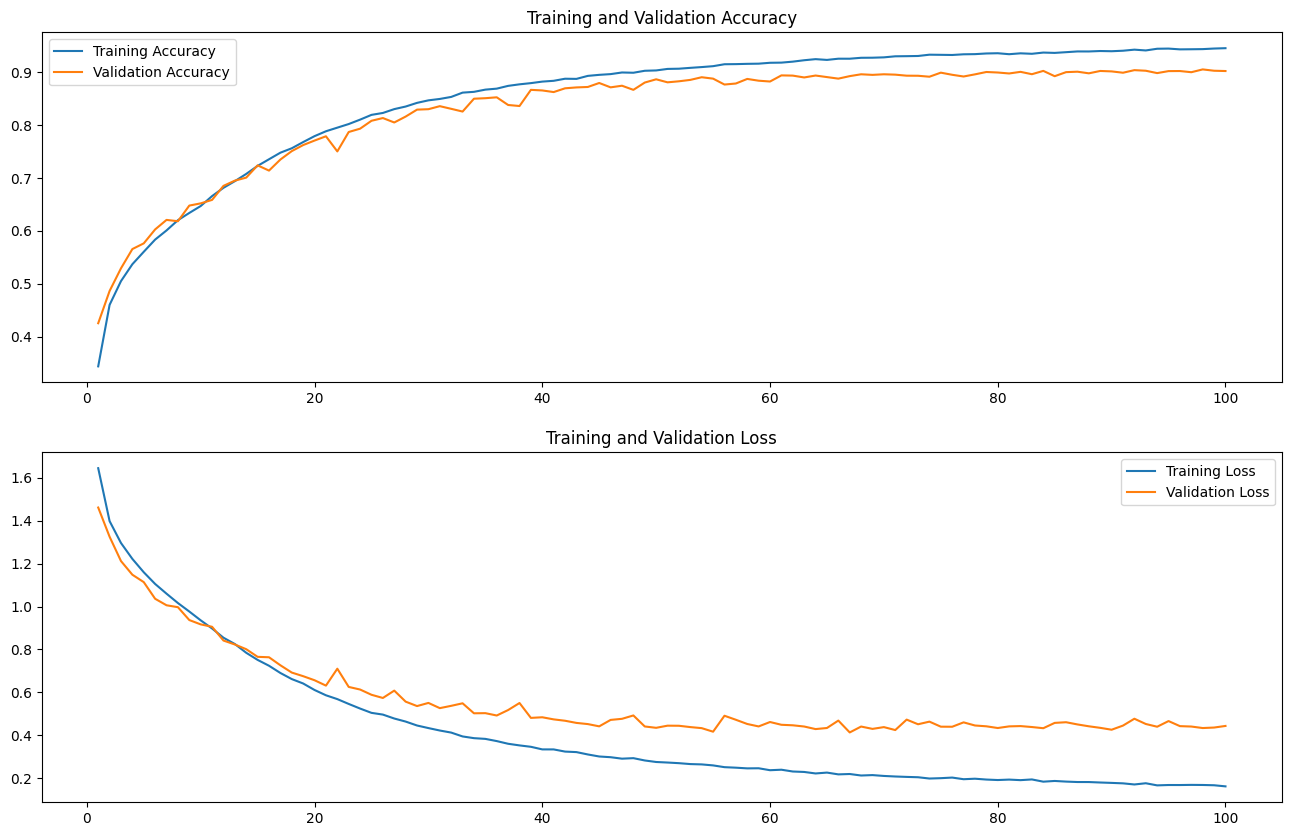

In [36]:
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
plt.plot(range(1, Epochs+1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, Epochs+1), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.subplot(2,1,2)
plt.plot(range(1, Epochs+1), history.history['loss'], label='Training Loss')
plt.plot(range(1, Epochs+1), history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(["Training Loss","Validation Loss"])
plt.show()

In [37]:
X_test = np.array(X_test)
print(len(X_train), X_test.shape)

53828 (10772, 64, 64)


In [38]:
pred = model.predict(X_test)

337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [39]:
pred = pred.argmax(axis=1)

In [40]:
scores = model.evaluate(X_test, y_test)

337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9005 - loss: 0.4739


In [41]:
scores

[0.4660166800022125, 0.9038247466087341]

In [42]:
target_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

       Angry       0.87      0.89      0.88      1487
     Disgust       0.97      0.88      0.92       165
        Fear       0.91      0.84      0.87      1537
       Happy       0.96      0.96      0.96      2698
     Neutral       0.85      0.90      0.88      1860
         Sad       0.87      0.87      0.87      1824
    Surprise       0.94      0.94      0.94      1201

    accuracy                           0.90     10772
   macro avg       0.91      0.90      0.90     10772
weighted avg       0.90      0.90      0.90     10772



In [43]:
model.save('Custom1_2.h5')

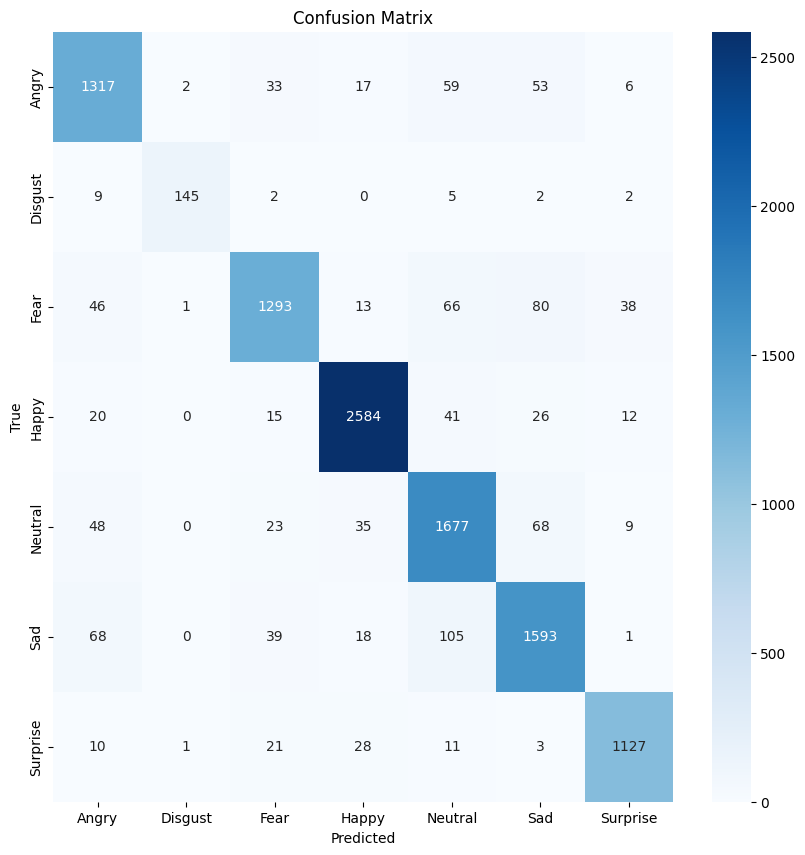

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()